In [51]:
import constructor
import sklearn
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn.functional as F

In [102]:
json_file = {'cnt' : 3, 'type': 'regression', 
             'layers_info' : [1, 100, 100, 100], 'output': 1, 
             'active_f': ['relu', 'relu', 'relu'], 'rate' : 0.001}
info = constructor.Information(json_file)
my_model = constructor.NeuralNetwork(info)
optimizer = torch.optim.Adam(my_model.parameters(), lr=info.rate)
criterion = constructor.loss_functions[info.type_module]

## Пример с регрессией

In [103]:
X, y = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=10, shuffle=True, coef=False, random_state=None)

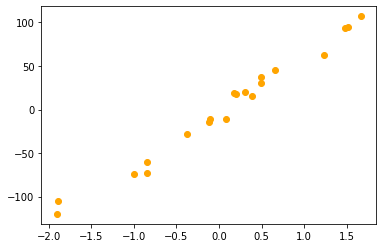

In [104]:
plt.scatter(X, y, color='orange')

In [105]:
train_x = torch.from_numpy(X[:15]).float()
train_y = torch.from_numpy(y[:15]).float()
train_y = train_y.view(len(train_y), 1)
test_x = torch.from_numpy(X[15:]).float()
test_y = torch.from_numpy(y[15:]).float()
test_y = test_y.view(len(test_y), 1)

In [111]:
history = []
constructor.study(my_model, train_x, train_y, test_x, test_y, criterion, 
                  optimizer, 100, history)

100%|██████████| 100/100 [00:00<00:00, 1088.10it/s]


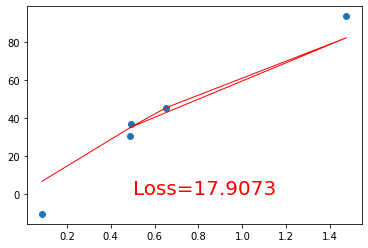

In [112]:
pred = my_model(test_x)
plt.cla()
plt.scatter(test_x.data.numpy(), test_y.data.numpy())
plt.plot(test_x.data.numpy(), pred.data.numpy(), 'r-', lw=1)
loss = criterion(pred, test_y) / len(test_y)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.pause(0.1)

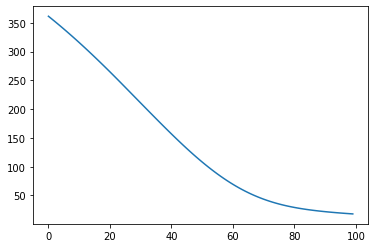

In [113]:
plt.plot([i for i in range(len(history))], history)

## Пример с классификацией

In [128]:
json_file2 = {'cnt' : 3, 'type': 'classification', 'layers_info' : [3, 50, 20], 
              'output': 2, 'active_f': ['relu', 'relu'], 'rate' : 0.001}
info2 = constructor.Information(json_file2)
my_model2 = constructor.NeuralNetwork(info2)
optimizer2 = torch.optim.Adam(my_model2.parameters(), lr=info2.rate)
criterion2 = constructor.loss_functions[info2.type_module]

In [129]:
X,y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], 
                          random_state=17)

In [130]:
train_x2 = torch.FloatTensor(X[:800])
train_y2 = torch.LongTensor(y[:800])
test_x2 = torch.FloatTensor(X[800:])
test_y2 = torch.LongTensor(y[800:])

In [131]:
my_model2.eval()

MyNeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [132]:
torch.FloatTensor(X)

tensor([[-0.3779,  1.4499, -0.7930],
        [ 1.6707, -2.0897, -0.4104],
        [ 1.4636, -0.0717, -0.5266],
        ...,
        [-0.7818,  0.0704, -0.0299],
        [-1.5275, -0.4404, -0.8069],
        [ 0.6834, -1.7595, -0.2422]])

In [133]:
history = []
constructor.study(my_model2,train_x2, train_y2, test_x2, test_y2, criterion2, 
                  optimizer2, 100, history)

100%|██████████| 100/100 [00:00<00:00, 719.02it/s]


Text(1.5, -4, 'Accuracy=0.91')

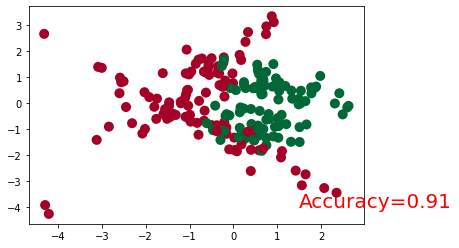

In [134]:
out = my_model2(test_x2)
plt.cla()
prediction = torch.max(out, 1)[1]
pred_y = prediction.data.numpy()
target_y = test_y2.data.numpy()
plt.scatter(test_x2.data.numpy()[:, 0], test_x2.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})

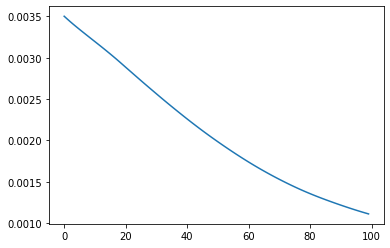

In [135]:
plt.plot([i for i in range(len(history))], history)

## Пример кластеризации

In [152]:
json_file3 = {'cnt' : 3, 'type': 'classification', 'layers_info' : [8, 50, 50], 
              'output': 5, 'active_f': ['relu', 'relu'], 'rate' : 0.01}
info3 = constructor.Information(json_file3)
my_model3 = constructor.NeuralNetwork(info3)
optimizer3 = torch.optim.Adam(my_model3.parameters(), lr=info3.rate)
criterion3 = constructor.loss_functions[info3.type_module]

In [147]:
X,y = make_classification(n_samples=1000, n_features=8, n_informative=8, n_redundant=0, n_repeated=0, 
                          n_classes=5, random_state=17)

In [148]:
train_x3 = torch.FloatTensor(X[:800])
train_y3 = torch.LongTensor(y[:800])
test_x3 = torch.FloatTensor(X[800:])
test_y3 = torch.LongTensor(y[800:])

In [153]:
history = []
constructor.study(my_model3,train_x3, train_y3, test_x3, test_y3, criterion3, 
                  optimizer3, 50, history)

100%|██████████| 50/50 [00:00<00:00, 598.97it/s]


Text(1.5, -4, 'Accuracy=0.77')

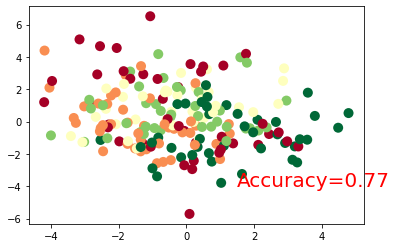

In [154]:
out = my_model3(test_x3)
plt.cla()
prediction = torch.max(out, 1)[1]
pred_y = prediction.data.numpy()
target_y = test_y3.data.numpy()
plt.scatter(test_x3.data.numpy()[:, 0], test_x3.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})

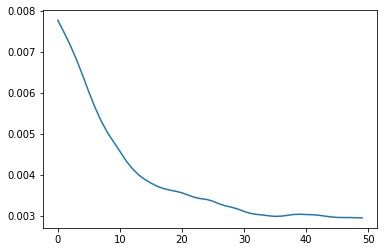

In [155]:
plt.plot([i for i in range(len(history))], history)